## Capstone Project - Machine Learning

Prior to this step, we have cleaned and wrangled the US Accident data and we used Seaborn and Matplotlib Libraries to cisualize the important features of the data. In this step, we will use some machine learning algorithms to predict the severity of the accident from the features we have extracted in data wrangling step.

### 1. Understanding the Data

We need to firstly check what is the data we have acquired after data wrangling:

In [1]:
# Import required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
print('x' in np.arange(5)) 

False


In [3]:
# Since we have so many columns in the dataframe, we need to change the Pandas settings to observe the data frame more efficiently:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 20
pd.options.display.min_rows = 20

In [4]:
# Upload the csv file into pandas
df = pd.read_csv(r'C:\Users\Servet\Desktop\Jupyter_Notebooks\US_Accidents_with_dummies.csv', index_col=0).sample(10000)

# Check how the data looks like
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,Street,Side,City,County,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Precipitation_isnull,Humidity_isnull,Wind_Speed_isnull,Pressure_isnull,Temperature_isnull,Windchill_isnull,Weather_isnull,Description_isnull,City_isnull,Timezone_isnull,Zipcode_isnull,Airport_Code_isnull,Year,Month,Day,Hour,Weekday,Time_Duration(min),Nautical_Twilight_isnull,Sunrise_Sunset_isnull,Civil_Twilight_isnull,Astronomical_Twilight_isnull,Weather_Timestamp_isnull,Wind_Direction_isnull,Visibility(mi)_isnull,Number_isnull,Weather_Condition_Blowing Sand,Weather_Condition_Blowing Snow,Weather_Condition_Clear,Weather_Condition_Drizzle,Weather_Condition_Fog,Weather_Condition_Funnel Cloud,Weather_Condition_Hail,Weather_Condition_Haze,Weather_Condition_Heavy Blowing Snow,Weather_Condition_Heavy Drizzle,Weather_Condition_Heavy Freezing Rain,Weather_Condition_Heavy Ice Pellets,Weather_Condition_Heavy Rain,Weather_Condition_Heavy Rain Showers,Weather_Condition_Heavy Smoke,Weather_Condition_Heavy Snow,Weather_Condition_Heavy Thunderstorms and Rain,Weather_Condition_Heavy Thunderstorms and Snow,Weather_Condition_Heavy Thunderstorms with Small Hail,Weather_Condition_Ice Pellets,Weather_Condition_Light Drizzle,Weather_Condition_Light Fog,Weather_Condition_Light Freezing Drizzle,Weather_Condition_Light Freezing Fog,Weather_Condition_Light Freezing Rain,Weather_Condition_Light Hail,Weather_Condition_Light Haze,Weather_Condition_Light Ice Pellets,Weather_Condition_Light Rain,Weather_Condition_Light Rain Showers,Weather_Condition_Light Snow,Weather_Condition_Light Snow Showers,Weather_Condition_Light Thunderstorms and Rain,Weather_Condition_Light Thunderstorms and Snow,Weather_Condition_Low Drifting Snow,Weather_Condition_Mist,Weather_Condition_Mostly Cloudy,Weather_Condition_NaN,Weather_Condition_Overcast,Weather_Condition_Partly Cloudy,Weather_Condition_Patches of Fog,Weather_Condition_Rain,Weather_Condition_Rain Showers,Weather_Condition_Sand,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_Small Hail,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Snow Grains,Weather_Condition_Snow Showers,Weather_Condition_Squalls,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Volcanic Ash,Weather_Condition_Widespread Dust,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
237137,A-237138,MapQuest,201,3,2017-01-24 08:51:00,2017-01-24 09:51:00,39.349163,-76.745705,0.01,Right hand shoulder blocked due to accident on...,7053.500000,I-695 S,R,Gwynn Oak,Baltimore County,21207,US,US/Eastern,KDMH,1/24/2017 8:54,42.1,42.1,70.0,29.50,9.056237,North,8.715629,0.059667,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,1,0,1,0,0,1,1,0,0,0,0,0,2017,Jan,24,8,Tue,60.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
785193,A-785194,MapQuest-Bing,201,3,2018-11-20 09:38:00,2018-11-20 10:08:00,37.651657,-122.098671,0.00,#3 lane blocked due to accident on I-880 South...,12975.333333,Nimitz Fwy S,R,H

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 237137 to 747300
Columns: 176 entries, ID to State_WY
dtypes: bool(13), float64(12), int64(130), object(21)
memory usage: 12.6+ MB


In [6]:
# Now, we will define target and feature variables. Since this project is trying to generate a model to predict the severity of accidents, we will use "Severrity" as targetr variable
target_names = ['Severity']
feature_names = [c for c in df.columns if c not in target_names and df[c].dtype != object and not c.endswith('Time')]

In [7]:
# We will use X and y for the feature and target variables
X = df[feature_names]
y = df[target_names]
X.shape

(10000, 154)


There are 154 features in our feature variables list, which will cause our model to score less due to curse of dimensionality. We may need to perform some feature reduction techniques

### 2. Predict Severity with Machine Learning Algorithms - Linear Regression


Severity, the target variable is labeled from 0 to 4 can be considered as an ordinal numerical variable. The linear regression model may work, however, the target variable can take only discrete numbers, the model might be weaker. We will start our machine learning algorithms with a linear model.

In [8]:
# Split the data to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=30, stratify=y)

# Import accuracy score from sckit learn
from sklearn.metrics import accuracy_score

# Import Cross-Validation from scikitlearn
from sklearn.model_selection import cross_val_score

# Import Linear Regression library and MSE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
# Instantiate a linear model as lr and fit on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# We will check the model's strength on training and testing set and see the percent change
print("linear regression score for training set:{}".format(lr.score(X_train,y_train)))
print("linear regression score for testing set:{}".format(lr.score(X_test,y_test)))
print("the percent change from trainig set to testing set is: {}".format(100*(lr.score(X_train,y_train)-lr.score(X_test,y_test))/lr.score(X_train,y_train)))

print("R^2: {}".format(lr.score(X_test, y_test)))

y_lr_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_lr_pred))
print("Root Mean Squared Error: {}".format(rmse))

linear regression score for training set:0.3383426100083716
linear regression score for testing set:0.3176128179117348
the percent change from trainig set to testing set is: 6.126864155869672
R^2: 0.3176128179117348
Root Mean Squared Error: 0.3997497904067871


In [10]:
# Cross-Validate the model
cv_lr_score = cross_val_score(lr,X_test,y_test,cv=10)
print(cv_lr_score)

[0.31627748 0.32507523 0.27988821 0.28991076 0.23145087 0.26966246
 0.2659033  0.3432173  0.21845901 0.08717334]


In [11]:
print("Average 10-Fold CV Score: {}".format(np.mean(cv_lr_score)))

Average 10-Fold CV Score: 0.2627017953621315


#### Ridge Regression

In [12]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.3170884447954758

#### Lasso Regression

In [13]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

-6.672282037989419e-08

### 3. Logistic Regression

In this problem, we have 5 outcomes for the target variable: 0,1,2,3,4. We can consider this problem as a multi-class classification problem and use logistic regression model from sklearn library.

In [14]:
# We need to convert y to numpy array and flatten it beforehand to do any calculations.
y = np.array(y)
y = y.flatten()
y.shape

(10000,)

In [15]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(C=100, max_iter=10000, penalty='l2')
logr.fit(X_train, y_train.values.ravel())
print("The logistic regression score on the training data:{}".format(logr.score(X_train,y_train)))

print("The logistic regression score on the testing data:{}".format(logr.score(X_test,y_test)))

The logistic regression score on the training data:0.767375
The logistic regression score on the testing data:0.7675


This logistic regression gives a warning since the data is not scaled. To remove the warning message, we will try to scale the data

In [16]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
Xs = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(scale(X)))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(scale(X))))

Mean of Unscaled Features: TMC                207.835600
Start_Lat           36.085978
Start_Lng          -95.010184
Distance(mi)         0.151919
Number            5346.930202
Temperature(F)      61.860087
Wind_Chill(F)       60.660007
Humidity(%)         66.643906
Pressure(in)        30.035812
Visibility(mi)       9.054093
                     ...     
State_SD             0.000000
State_TN             0.014600
State_TX             0.129000
State_UT             0.005700
State_VA             0.027500
State_VT             0.000000
State_WA             0.019300
State_WI             0.003400
State_WV             0.000000
State_WY             0.000000
Length: 154, dtype: float64
Standard Deviation of Unscaled Features: TMC                 19.784503
Start_Lat            4.909746
Start_Lng           17.119290
Distance(mi)         1.369279
Number            6932.666463
Temperature(F)      18.907802
Wind_Chill(F)       21.124520
Humidity(%)         21.617792
Pressure(in)         0.202806
Visi

In [17]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.20, random_state=30)
logr.fit(Xs_train, y_train)
print("The logistic regression score on the scale training data:{}".format(logr.score(Xs_train,y_train)))

print("The logistic regression score on the scaled testing data:{}".format(logr.score(Xs_test,y_test)))

The logistic regression score on the scale training data:0.78025
The logistic regression score on the scaled testing data:0.7495


We can observe that the scaled data yields a higher training and test score

In [18]:
# Cross-Validate the model
cv_logr_score = cross_val_score(logr,Xs_test,y_test,cv=10)
print(cv_logr_score)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.735 0.755 0.665 0.73  0.75  0.7   0.71  0.735 0.705 0.7  ]


#### Classification Report

In [19]:
from sklearn.metrics import classification_report
ys_pred = logr.predict(Xs_test)
print(classification_report(y_test, ys_pred, zero_division=1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.86      0.73      0.79      1279
           3       0.62      0.79      0.70       716
           4       0.00      0.00      0.00         3

    accuracy                           0.75      2000
   macro avg       0.37      0.38      0.37      2000
weighted avg       0.77      0.75      0.75      2000



#### Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 4, 10)
param_grid = {'C': c_space}


# Instantiate the GridSearchCV object: logreg_cv
logr_cv = GridSearchCV(logr, param_grid, cv=2)

# Fit it to the data
logr_cv.fit(Xs,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logr_cv.best_params_)) 
print("Best score is {}".format(logr_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 10.0}
Best score is 0.7667999999999999


In [21]:
logr = LogisticRegression(C=0.01, max_iter=10000, penalty='l2')
logr.fit(Xs_train, y_train)
print("The logistic regression score on the scale training data:{}".format(logr.score(Xs_train,y_train)))

print("The logistic regression score on the scaled testing data:{}".format(logr.score(Xs_test,y_test)))

The logistic regression score on the scale training data:0.778375
The logistic regression score on the scaled testing data:0.7475


### 4. KNN-Neighborhood

Since this problem can be considered as a classification problem, KNN neighborghood model can be also utilized to predict the target variable.

In [22]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)

print("The KNN score on the training set:{}".format(knn.score(X_train,y_train)))

print("The KNN score on the testing set:{}".format(knn.score(X_test,y_test)))

The KNN score on the training set:0.690375
The KNN score on the testing set:0.595


In [23]:
# We will try the same algorithm on the scaled data:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)

print("The KNN score on the training set:{}".format(knn.score(X_train,y_train)))

print("The KNN score on the testing set:{}".format(knn.score(X_test,y_test)))

The KNN score on the training set:0.690375
The KNN score on the testing set:0.595


There is a significant difference between the training and testing set scores, that we can suspect an overfitting issue. We will perform the same algorithm with the scaled test to improve the model

In [24]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(Xs_train,y_train)

print("The KNN score on the scale training data:{}".format(knn.score(Xs_train,y_train)))

print("The KNN score on the scaled testing data:{}".format(knn.score(Xs_test,y_test)))

The KNN score on the scale training data:0.789
The KNN score on the scaled testing data:0.712


In [28]:
param_grid = {'n_neighbors':np.arange(1,15)}
knn_cv = GridSearchCV(knn, param_grid, cv=2)
knn_cv.fit(Xs,y)
knn_cv.best_params_

{'n_neighbors': 13}

In [29]:
knn = KNeighborsClassifier(n_neighbors = knn_cv.best_params_['n_neighbors'])
knn.fit(Xs_train,y_train)

print("The KNN score on the scale training data:{}".format(knn.score(Xs_train,y_train)))

print("The KNN score on the scaled testing data:{}".format(knn.score(Xs_test,y_test)))

The KNN score on the scale training data:0.767
The KNN score on the scaled testing data:0.697


There is a significant difference between the train and test scores, in which we suspect overfitting.

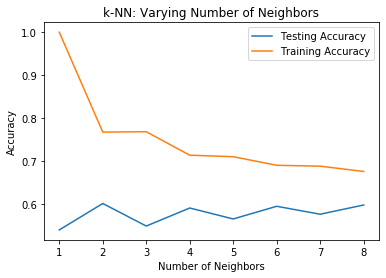

In [30]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Confusion Matrix and Classification Report

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0    2    0    0]
 [   0 1113  166    0]
 [   0  633   83    0]
 [   0    3    0    0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.64      0.87      0.73      1279
           3       0.33      0.12      0.17       716
           4       0.00      0.00      0.00         3

    accuracy                           0.60      2000
   macro avg       0.24      0.25      0.23      2000
weighted avg       0.53      0.60      0.53      2000



C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5. Decision Tree

In [32]:
# Decision tree algorithm
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)


# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)


print("Decision tree entropy score on the training data:{}".format(dt_entropy.score(X_train,y_train)))

print("Decision tree entropy score on the testing data:{}".format(dt_entropy.score(X_test,y_test)))

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)


# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))



Decision tree entropy score on the training data:0.64575
Decision tree entropy score on the testing data:0.629
[Decision Tree -- entropy] accuracy_score: 0.629.


In [34]:
# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)


# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)


print("Decision tree gini score on the training data:{}".format(dt_gini.score(X_train,y_train)))

print("Decision tree gini score on the testing data:{}".format(dt_gini.score(X_test,y_test)))

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
acc=accuracy_gini

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

Decision tree gini score on the training data:0.650375
Decision tree gini score on the testing data:0.629
[Decision Tree -- gini] accuracy_score: 0.629.


### 6. Random Forest

In [36]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(Xs_train,y_train)

y_pred=clf.predict(Xs_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)


# Model Accuracy, how often is the classifier correct?
print("[Random forest algorithm] accuracy_score: {:.3f}.".format(acc))

print("The clf score on the training data:{}".format(logr.score(Xs_train,y_train)))

print("The clf regression score on the testing data:{}".format(logr.score(Xs_test,y_test)))

[Random forest algorithm] accuracy_score: 0.782.
The clf score on the training data:0.778375
The clf regression score on the testing data:0.7475


### 7. Feature Selection

In [37]:
# We need to check the data typeds of X and Xs
print(type(X))
print(type(Xs))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [38]:
# Change the data type of Xs
df_Xs = pd.DataFrame(Xs)
type(df_Xs)

pandas.core.frame.DataFrame

In [41]:
# Create a mask with Variance threshold
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)
sel.fit(df_Xs)

mask = sel.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True False False  True  True
  True  True  True  True  True False False False False  True  True  True
  True False  True  True  True  True False False  True False  True False
 False  True False False  True  True False False False  True False  True
  True  True False False False  True False  True False  True False False
  True  True  True  True  True  True  True False False  True  True False
  True  True False False False  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True False  True False
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True False  True  True False False]


In [42]:
Xs_reduced = df_Xs.loc[:,mask]
type(Xs_reduced)

pandas.core.frame.DataFrame

In [53]:
Xs_reduced_train, Xs_reduced_test, y_train, y_test = train_test_split( Xs_reduced, y, test_size=0.20, random_state=30, stratify=y)

lr.fit(Xs_reduced_train,y_train)

print("The lr score on the reduced training data:{}".format(lr.score(Xs_reduced_train,y_train)))
print("The lr score on the reduced training data:{}".format(lr.score(Xs_reduced_test,y_test)))

The lr score on the reduced training data:0.33829898614295917
The lr score on the reduced training data:0.31733639950074644


In [54]:
logr.fit(Xs_reduced_train,y_train)

print("The logr score on the reduced training data:{}".format(logr.score(Xs_reduced_train,y_train)))
print("The logr score on the reduced training data:{}".format(logr.score(Xs_reduced_test,y_test)))

The logr score on the reduced training data:0.7735
The logr score on the reduced training data:0.7665


In [52]:
knn.fit(Xs_reduced_train,y_train)

print("The KNN score on the reduced training data:{}".format(knn.score(Xs_reduced_train,y_train)))
print("The KNN score on the reduced training data:{}".format(knn.score(Xs_reduced_test,y_test)))

The KNN score on the reduced training data:0.779125
The KNN score on the reduced training data:0.705


In [55]:
# Fit dt_entropy to the training set
dt_entropy.fit(Xs_reduced_train, y_train)


print("Decision tree entropy score on the training data:{}".format(dt_entropy.score(Xs_reduced_train,y_train)))

print("Decision tree entropy score on the testing data:{}".format(dt_entropy.score(Xs_reduced_test,y_test)))

Decision tree entropy score on the training data:0.8125
Decision tree entropy score on the testing data:0.7785


In [56]:
clf.fit(Xs_reduced_train,y_train)

print("The clf score on the training data:{}".format(logr.score(Xs_reduced_train,y_train)))

print("The clf regression score on the testing data:{}".format(logr.score(Xs_reduced_test,y_test)))

The clf score on the training data:0.7735
The clf regression score on the testing data:0.7665
